In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
road = cv2.imread('Computer-Vision-with-Python/DATA/road_image.jpg')
road_copy = np.copy(road)

(600, 800, 3)

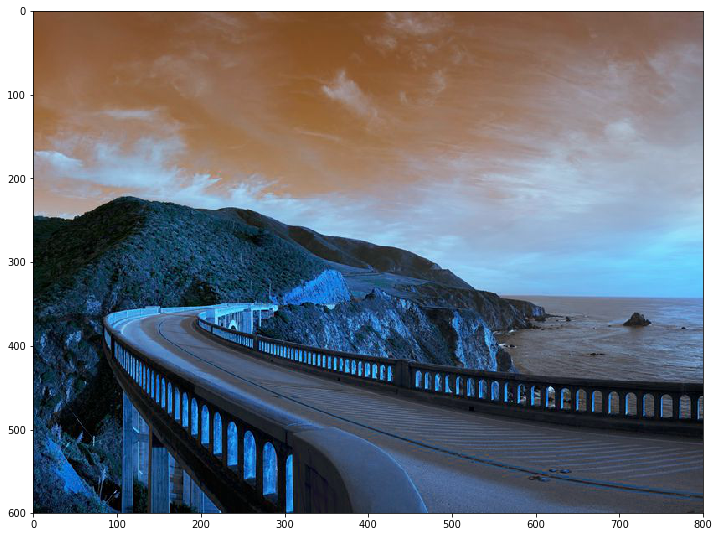

In [4]:
display(road)
road.shape

In [5]:
marker_image = np.zeros(road.shape[:2],dtype=np.int32)

In [6]:
##  same size, for markers

segments = np.zeros(road.shape[:2],dtype=np.uint8)

In [7]:
from matplotlib import cm

In [8]:
cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [9]:
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

In [10]:
colors = []

for i in range(10):
    colors.append(create_rgb(i))
    
colors

## this is the cating for BGR

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [11]:
###
## GLOBAL VARS

current_marker = 1
marks_updated = False
n_markers=10

In [12]:
## CALLBACK FUNC

def mouse_callback(event,x,y,flags,param):
    global marks_updated
    
    if event== cv2.EVENT_LBUTTONDOWN:
        
        # Markers passed to the watershed
        cv2.circle(marker_image,(x,y),10,(current_marker),-1)
        
        # User sees on the image
        cv2.circle(road_copy,(x,y),10,colors[current_marker],-1)

        marks_updated = True
        
    

In [14]:
## WHILE TRUE

cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)

while True:
    cv2.imshow('Watershed Segments',segments)
    cv2.imshow('Road Image', road_copy)
    
    # CLOSE ALL WINDOWS
    k = cv2.waitKey(1)
    if k == 27:
        break
    
    # CLEARING ALL COLORS UPON C KEY
    elif k == ord('c'):
        road_copy=road.copy()
        marker_image = np.zeros(road.shape[:2],dtype=np.int32)
        segments=np.zeros(road.shape, dtype=np.uint8)
        
    
    #UPDATE COLOR CHOICE
    elif k > 0 and chr(k).isdigit():
        current_marker = int(chr(k))
    
    
    # UPDATE THE MARKINGS
    if marks_updated:
        marker_image_copy = marker_image.copy()
        cv2.watershed(road,marker_image_copy)
        
        segments = np.zeros(road.shape, dtype=np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy == (color_ind)] = colors[color_ind]
    
    
    
cv2.destroyAllWindows()
    